# Matplotlib

Matplotlib（マットプロットリブ）は図を描くためのパッケージである。どこまで手の込んだ図を書くかによってコードが違ってくるが，ここでは`pyplot`というサブパッケージを使い，一番シンプルなコードになるものを紹介する。ここで説明することができない多くの機能が備わっているが，この[リンク](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)が参考になるだろう。

通常，`plt`として読み込む。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 図の作成

`df`を再度読み直す。今回は`year`を行ラベルにせず，インデックス番号をそのまま使う。

In [2]:
url = 'https://raw.githubusercontent.com/Haruyama-KobeU/Haruyama-KobeU.github.io/master/data/data1.csv'
df = pd.read_csv(url).dropna()
df.head(3)

,year,gdp,inv,con,pop,id
0,2000,100,20.0,80.0,8,a
1,2001,95,25.0,70.0,9,b
2,2002,93,21.0,72.0,10,a


`gdp`を縦軸にした図を描く。**Jupyter Notebook**を使うと最小限必要なコードは１行となる。

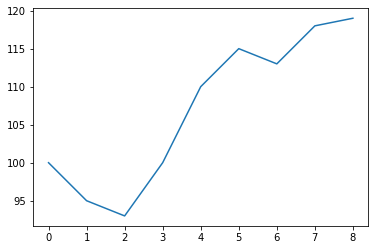

In [3]:
plt.plot('gdp', data=df);

* `()`内の最初の変数は縦軸の変数，次はデータの指定
    * 下で説明するが最初の変数は横軸の変数が入ることになるが，この例では省略されているため，デフォルトとして行のインデックスが使われている。
* デフォルトは線グラフ
* 行の最後に`;`があることに注意。これは「以降の出力をストップ」といいう意味である。
    * `;`は省略可能。省略すると特に必要でないものが示される（試そう！）

`;`を使う代わりに
```
plt.plot('gdp', data=df)
pass
```
としても同じ結果となる。`pass`は文字通り「それ以降の出力をパスする」という意味。もしくは
```
_ = plt.plot('gdp', data=df)
```
でもOK。ここでは，それ以降の出力を`_`に割り当てている。`_`を単独で使う場合，必要でない値を代入する変数によく使われる記号である。

---
上の図の不満な点は，横軸が不明なこと（単に`gdp`のデータ数に従って1,2,..と番号が振られている）。

````{note}
上のコードでは横軸の変数が指定されておらず，デフォルトでは行インデックスが使われことになる。従って，
```
df = df.set_index('year')
```
のように`year`を行インデックスに指定すると，自動的に横軸には`year`が入ることになる。このことを理解した上で，以下では横軸を明示的に指定する場合を想定して説明を続ける。
````

横軸の変数を指定するには，`()`内に該当する変数を追加するだけである。ただ順番に気をつけること。

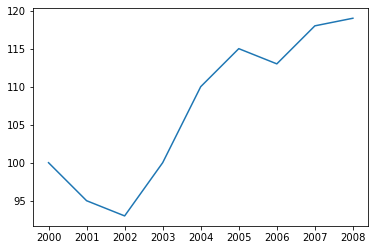

In [4]:
plt.plot('year', 'gdp', data=df);

コードをみて分かるように
* `()`内の最初の変数は横軸の変数，２番目の変数は縦軸の変数，３番目はデータの指定

３番目のデータ指定は「このデータの中にある`year`と`gdp`を使う」ことを意味しており，データ指定がなければ`Python`はどの`year`と`gdp`か分からずにエラーとなる。一方で，データ指定をせずに，直接横軸・縦軸の変数を指定することも可能である。以下がその例：

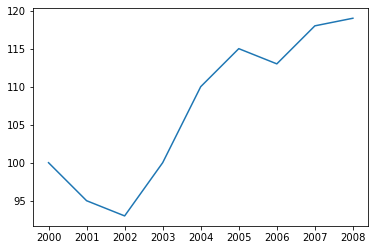

In [5]:
plt.plot(df['year'], df['gdp']);

上の図で何をプロットしているかを分かっている場合はこれで十分だが，論文などに使う場合は不十分である。以下では「飾り付け」をする。

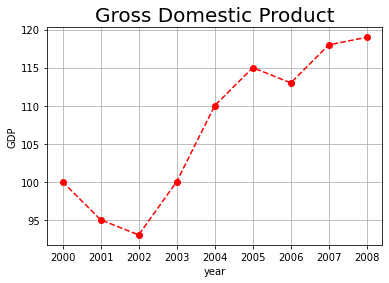

In [6]:
plt.plot('year', 'gdp',       # 横軸の変数，　　縦軸の変数
         color='red',         # 色 ：　赤
         linestyle='dashed',  # 線のタイプ：点線
         marker='o',          # マーカー：点
         data=df)             # データの指定
plt.xlabel('year')            # 横軸のラベル
plt.ylabel('GDP')             # 縦軸のラベル
plt.title('Gross Domestic Product', size=20)  # 図のタイトル   size=は省略可能
plt.grid()                    # グリッドの表示

様々なオプションが用意されている


|色  | 省略形|
|:---|:---:|
|blue | b  |
|green | g |
|red | r   |
|cyan | c  |
|magenta | m |
|yellow | y |
|black | k |
|white | w |


|線のスタイル | 説明 |
|:---:|:---------|
|-  | solid line style |
|-- |dashed line style |
|-. | dash-dot line style |
|:  | dotted line style |

|マーカー | 説明 |
|:------:|:----|
|.	| point marker |
|,	| pixel marker |
|o	| circle marker |
|v	| triangle_down marker |
|\* | star marker |
|+	|plus marker |
|x	| x marker |

数多くのオプションがある。[ここを参照](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)。

このようなオプションも簡略化して書くこともできる。例えば，上のコードで
```
color='red',
linestyle='dashed',
marker='o',
```
の３行を以下の一行にまとめることも可能である。
```
'r--o',
```

**複数の図**

単に`plt.plot()`を並べるだけである。

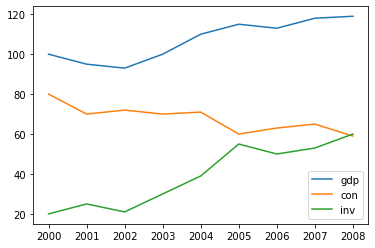

In [7]:
plt.plot('year', 'gdp', data=df)
plt.plot('year', 'con', data=df)
plt.plot('year', 'inv', data=df)
plt.legend();   # 凡例

**散布図の描画**

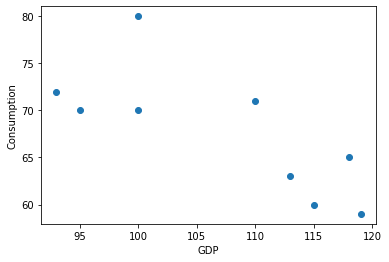

In [8]:
plt.scatter('gdp', 'con', data=df)  # 横軸の変数　　縦軸の変数
plt.xlabel('GDP')                   #　横軸のラベル （省略可）
plt.ylabel('Consumption');          # 縦軸のラベル（省略可）

次のコードでも同じ結果となる。

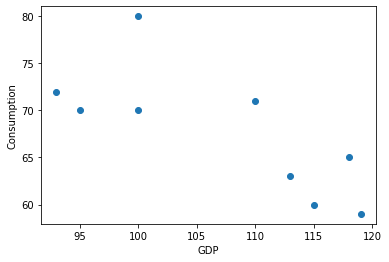

In [9]:
plt.plot('gdp', 'con', 'o',  data=df)
plt.xlabel('GDP')
plt.ylabel('Consumption');

ここで指定した`'o'`は，`marker='o', linestyle=''`の省略形である。例えば，`'o'`の代わりに`'o-'`として表示の変化を確かめてみよう。

**ヒストグラム**

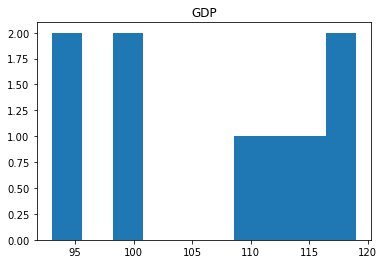

In [10]:
plt.hist(df['gdp'])
plt.title('GDP')   # 省略可
pass

**パイチャート**

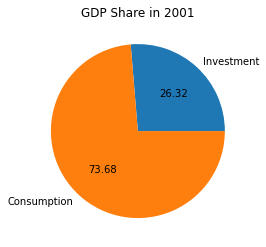

In [11]:
lab = ['Investment', 'Consumption']  # ラベルの作成
dt = df.loc[1,['inv','con']]         # 2001年のデータを取り出す
plt.pie(dt,                          # データの指定
        labels=lab,                  # ラベルの指定 （省略可だが，ある方がわかりやすい）
        autopct='%.2f')              # ％表示  （省略可）
plt.title('GDP Share in 2001')       # タイトル （省略可）
pass

**ボックスプロット**

解釈については[このサイト](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)を参照。

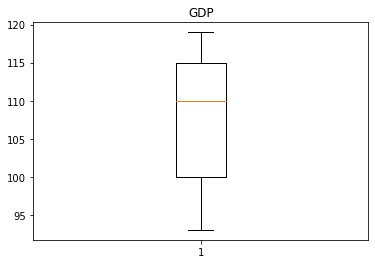

In [12]:
plt.boxplot(df['gdp'])
plt.title('GDP')   # 省略可
pass

## 複数の図を並べて表示

複数の図を「１つの図」として描画するために`subplot(a,b,c)`を使い，行と列を指定してそれぞれの図の位置を設定する。
* `a`：行の数
* `b`：列の数
* `c`：行・列を使って位置を指定

＜例：２×２の場合＞

`subplot(2,2,1)`: 左上の位置を指定

`subplot(2,2,2)`: 右上の位置を指定

`subplot(2,2,3)`: 左下の位置を指定

`subplot(2,2,4)`: 右下の位置を指定

次の例では線形関数と２次関数を描くが，まず横軸の変数`x`のデータを作成する。

In [13]:
x = np.linspace(-2,2,100)

図の作成

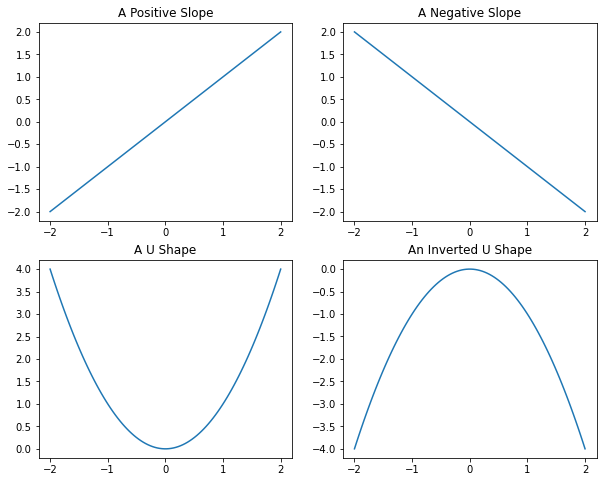

In [14]:
plt.figure(figsize=(10, 8))  # 図の大きさを設定（省略可）

# n = 5
plt.subplot(221)
plt.plot(x, x)
plt.title('A Positive Slope')

# n = 10
plt.subplot(222)
plt.plot(x, -x)
plt.title('A Negative Slope')

# n = 100
plt.subplot(223)
plt.plot(x, x**2)
plt.title('A U Shape')

# n = 1000
plt.subplot(224)
plt.plot(x, -x**2)
plt.title('An Inverted U Shape')
pass

## 図の保存方法

### 方法１

例として，図を`png`ファイルで保存する場合を考えよう。

＜開いている`Jupyter Notebook`のファイルと同じフォルダーに保存する場合＞

```
plt.savefig('<ファイル名.png')
```

を使う。この場合`;`や`pass`を使を必要はない。

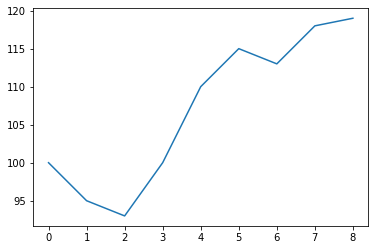

In [15]:
plt.plot('gdp', data=df)
plt.savefig('gdp.png')

保存できる画像ファイルの種類には以下がある。

`png`，`jpg`，`pdf`，`ps`，`eps`，`svg`

これらのフォーマットで保存する場合は，上のコードの`png`を`pdf`等に入れ替える。

---
＜Mac: 開いている`Jupyter Notebook`のファイルのサブフォルダーフォルダーに保存する場合＞

例えば，サブフォルダー`temp`に画像を保存したい場合は
```
plt.savefig('./temp/<ファイル名.png')
```
とする。ここで`.`は開いている`Jupyter Notebook`のファイルがあるフォルダーを表しており，セル内で`pwd`を実行すると表示される。

```{note}
TerminalもしくはGit Bashで使うコマンド`pwd`をコードセルで使う事ができる。`%pwd`を実行すると`Jupyter Notebook`のカレント・ディレクトリのパスが表示される。`%`が最初にくるコマンドはMagic Commandと呼ばれるものであり，この他`%ls`や以下で説明する`%matplotlib`もある。非常に便利なので[このサイト](https://ipython.readthedocs.io/en/stable/interactive/magics.html)を参照して欲しい。
```

### 方法２

この章の最初に次の３つのパッケージをインポートした。
```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```
第二の方法は，`matplotlib`を読み込む前に次のように`%matplotlib notebook`を読み込む。
```
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

`%matplotlib notebook`を読み込み図示すると図を保存するアイコンが出てくるのでそれを押してみよう。

````{warning}
次のようなメッセージが表示される場合は，メニューから＜Kernel＞ → ＜Restart＞を選んで最初から読み直すと良いだろう。
```
Warning: Cannot change to a different GUI toolkit
```
````

### 方法３

方法２の`%matplotlib notebook`の代わりに`%matplotlib qt`を読み込む。
```
%matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

図がポップアップとして表示され図を保存するアイコンが出てくるのでそれを押してみよう。

````{warning}
次のようなメッセージが表示される場合は，メニューから＜Kernel＞ → ＜Restart＞を選んで最初から読み直すと良いだろう。
```
Warning: Cannot change to a different GUI toolkit
```
````